---
**Importing Libraries:**
* To get started we will use Python for data pre-processing .
* Import python libraries as necessary to get started for data load and later import other libraries as needed
---

In [6]:
#Import all necessary libraries
import numpy as np 
import pandas as pd 


---
# Dataset Load
---

**Dataset:**

* **train_data.csv** - training data with multiple statement dates per customer_ID
* **train_labels.csv** - target label for each customer_ID


---

---
Considering large number of rows around 5.5 million in **train_data.csv** dataset, using nrows option to load first 200000 rows from dataset file for Model building.

---

Load train_data.csv dataset file using nrows=200000

In [7]:
# Loading dataset train_data.csv
df = pd.read_csv('../input/amex-default-prediction/train_data.csv', nrows=200000)

In [8]:
# get shape of dataframe
print('Shape of dataset is:', df.shape)

Shape of dataset is: (200000, 190)


In [9]:
# print summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 289.9+ MB


**Observations:**

* There are total 190 variables in train_data.csv dataset
    * There are 185 variables(Columns) as dtype float64, 1 variable(Column) as dtype int64 and 4 variables(Columns) as dtype object

---
Need to load **train_labels.csv** for customer_ID with target label as 1 for Default and 0 for Not Default

---

In [10]:
# Loading dataset train_labels.csv
df_label = pd.read_csv('../input/amex-default-prediction/train_labels.csv')

In [11]:
# get shape of dataframe
print('Shape of dataset is:', df_label.shape)

Shape of dataset is: (458913, 2)


In [12]:
# print summary of dataframe
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


**Observations:**

* There are total 458,913 entries for target label with customer_ID
* There is variable (column) customer_ID which has dtype as object and variable (column) target which has dtype as int64

---
Need to merge train_labels dataset with train_data dataset for target label.

---

In [13]:
# Merge of train_df_sample and train_label_df dataframe using key as customer_ID
df = pd.merge(df, df_label, how="inner", on=["customer_ID"])

In [14]:
# print summary of merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 293.0+ MB


In [15]:
#display first 10 rows using head
df.head(10)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,0.009866,...,NaN,NaN,0.001924,0.008598,0.004529,NaN,0.000674,0.002223,0.002884,0
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,0.000783,...,NaN,NaN,0.001336,0.004361,0.009387,NaN,0.007727,0.007661,0.002225,0
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,NaN,NaN,0.002397,0.008452,0.005553,NaN,0.001831,0.009616,0.007385,0
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950845,0.009896,0.016888,1.003995,0.001789,0.102792,0.002519,0.009817,...,NaN,NaN,0.009742,0.003968,0.007945,NaN,0.008722,0.004369,0.000995,0
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868580,0.001082,0.001930,1.007504,0.001772,0.100470,0.004626,0.006073,...,NaN,NaN,0.003611,0.009607,0.007266,NaN,0.008763,0.004753,0.009068,0


In [16]:
#check if any duplicate row
df.duplicated().sum()

0

In [17]:
# Check for missing value
df.isna().sum()

customer_ID         0
S_2                 0
P_2              1542
D_39                0
B_1                 0
                ...  
D_142          165644
D_143            3503
D_144            1433
D_145            3503
target              0
Length: 191, dtype: int64

---
# Data Preprocessing

---

---
**Handle Variable with Missing Value**

---

---
Drop Variables with Missing Value (>=50%) in train dataset

---

In [18]:
#drop variables with missing values >=50% in the train dataframe
i=0
for col in df.columns:
    if (df[col].isnull().sum()/len(df[col])*100) >=50:
        print("Dropping column", col)
        df.drop(labels=col,axis=1,inplace=True)
        i=i+1
        
print("Total number of columns dropped in train dataframe", i)

Dropping column D_42
Dropping column D_49
Dropping column D_50
Dropping column D_53
Dropping column D_56
Dropping column S_9
Dropping column B_17
Dropping column D_66
Dropping column D_73
Dropping column D_76
Dropping column R_9
Dropping column D_82
Dropping column B_29
Dropping column D_87
Dropping column D_88
Dropping column D_105
Dropping column D_106
Dropping column R_26
Dropping column D_108
Dropping column D_110
Dropping column D_111
Dropping column B_39
Dropping column B_42
Dropping column D_132
Dropping column D_134
Dropping column D_135
Dropping column D_136
Dropping column D_137
Dropping column D_138
Dropping column D_142
Total number of columns dropped in train dataframe 30


In [19]:
df.shape

(200000, 161)

In [20]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [21]:
df.isna().sum()

customer_ID        0
S_2                0
P_2             1542
D_39               0
B_1                0
B_2               72
R_1                0
S_3            37665
D_41              72
B_3               72
D_43           60058
D_44            9929
B_4                0
D_45              72
B_5                0
R_2                0
D_46           43895
D_47               0
D_48           26011
B_6                7
B_7                0
B_8              848
D_51               0
B_9                0
R_3                0
D_52            1009
P_3            10887
B_10               0
S_5                0
B_11               0
S_6                0
D_54              72
R_4                0
S_7            37665
B_12               0
S_8                0
D_55            6524
B_13            1784
R_5                0
D_58               0
B_14               0
D_59            3767
D_60               0
D_61           21443
B_15             206
S_11               0
D_62           27433
D_63         

In [22]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,B_13,R_5,D_58,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.063902,0.059416,0.006466,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.118075,0.001882,0.158612,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,0.652984,0.008520,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.007554,0.080422,0.069067,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.0,0.005720,0.007084,0.000198,0.008907,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.670041,0.009968,0.004572,1.008949,2.0,0.004326,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.065261,0.057744,0.001614,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.118737,0.001610,0.148459,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,0.647093,0.002238,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.004832,0.081413,0.074166,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.0,0.007584,0.006677,0.001142,0.005907,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.668647,0.003921,0.004654,1.003205,2.0,0.008707,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,0.007605,0.068839,0.720884,0.060492,0.003259,0.334650,0.524568,0.189424,0.066982,0.056647,0.005126,1.337179,0.009355,0.007426,0.206629,0.738044,0.134073,0.048367,0.010077,0.000530,1.009184,0.006961,0.112229

Missing value treatment

In [23]:
#mode imputation on categorical columns
for col in list(df.select_dtypes(['category']).columns):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
 df[col].dtypes

dtype('int64')

In [25]:
for col in list(df.select_dtypes(['category']).columns):
    df[col] = df[col].astype('Int64')

In [26]:
for col in list(df.select_dtypes(['float64','int32','int64']).columns):

    df[col].fillna(np.mean(~df[col].isnull()), inplace=True)
    #df[col] = df[col].astype(np.float64)

In [27]:
 df[col].dtypes

dtype('int64')

In [28]:
df.reset_index(inplace=True, drop=True)

In [29]:
df.isna().sum()

customer_ID       0
S_2               0
P_2               0
D_39              0
B_1               0
B_2               0
R_1               0
S_3               0
D_41              0
B_3               0
D_43              0
D_44              0
B_4               0
D_45              0
B_5               0
R_2               0
D_46              0
D_47              0
D_48              0
B_6               0
B_7               0
B_8               0
D_51              0
B_9               0
R_3               0
D_52              0
P_3               0
B_10              0
S_5               0
B_11              0
S_6               0
D_54              0
R_4               0
S_7               0
B_12              0
S_8               0
D_55              0
B_13              0
R_5               0
D_58              0
B_14              0
D_59              0
D_60              0
D_61              0
B_15              0
S_11              0
D_62              0
D_63              0
D_64           8040
D_65              0


In [30]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,B_13,R_5,D_58,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.69971,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.063902,0.059416,0.006466,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.118075,0.001882,0.158612,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,0.652984,0.008520,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.007554,0.080422,0.069067,0.004327,0.007562,0.542025,0.007729,0.000272,0.001576,0.004239,0.001434,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.0,0.005720,0.007084,0.000198,0.008907,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.670041,0.009968,0.004572,1.008949,2.0,0.004326,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.69971,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.065261,0.057744,0.001614,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.118737,0.001610,0.148459,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,0.647093,0.002238,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.004832,0.081413,0.074166,0.004203,0.005304,0.542025,0.001864,0.000979,0.009896,0.007597,0.000509,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.0,0.007584,0.006677,0.001142,0.005907,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.668647,0.003921,0.004654,1.003205,2.0,0.008707,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,0.69971,0.007605,0.068839,0.720884,0.060492,0.003259,0.334650,0.524568,0.189424,0.066982,0.056647,0.005126,1.337179,0.009355,0.007426,0.206629,0.738044,0.134073,0.048367,0.010077,0.000530,1.00

In [31]:
df['S_2'] = pd.to_datetime(df['S_2'],format='%Y/%m/%d')

In [32]:
df.dtypes

customer_ID            object
S_2            datetime64[ns]
P_2                   float64
D_39                  float64
B_1                   float64
B_2                   float64
R_1                   float64
S_3                   float64
D_41                  float64
B_3                   float64
D_43                  float64
D_44                  float64
B_4                   float64
D_45                  float64
B_5                   float64
R_2                   float64
D_46                  float64
D_47                  float64
D_48                  float64
B_6                   float64
B_7                   float64
B_8                   float64
D_51                  float64
B_9                   float64
R_3                   float64
D_52                  float64
P_3                   float64
B_10                  float64
S_5                   float64
B_11                  float64
S_6                   float64
D_54                  float64
R_4                   float64
S_7       

In [33]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns 'D_63' and 'D_64'.
df['D_63']= label_encoder.fit_transform(df['D_63'])
df['D_64']= label_encoder.fit_transform(df['D_64'])  

<AxesSubplot:>

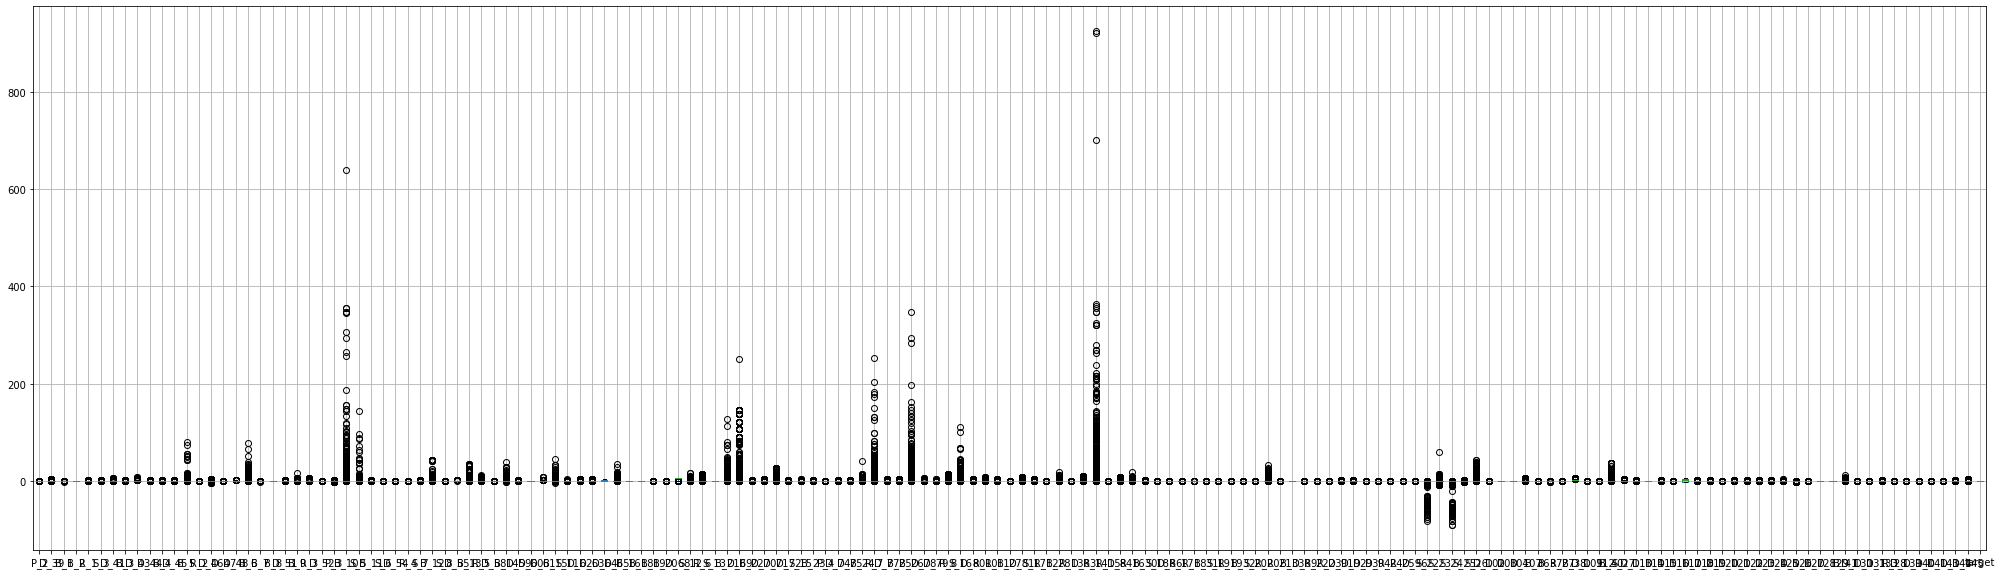

In [42]:
#Ploting boxplot
df.boxplot(figsize=(35,10))

<AxesSubplot:>

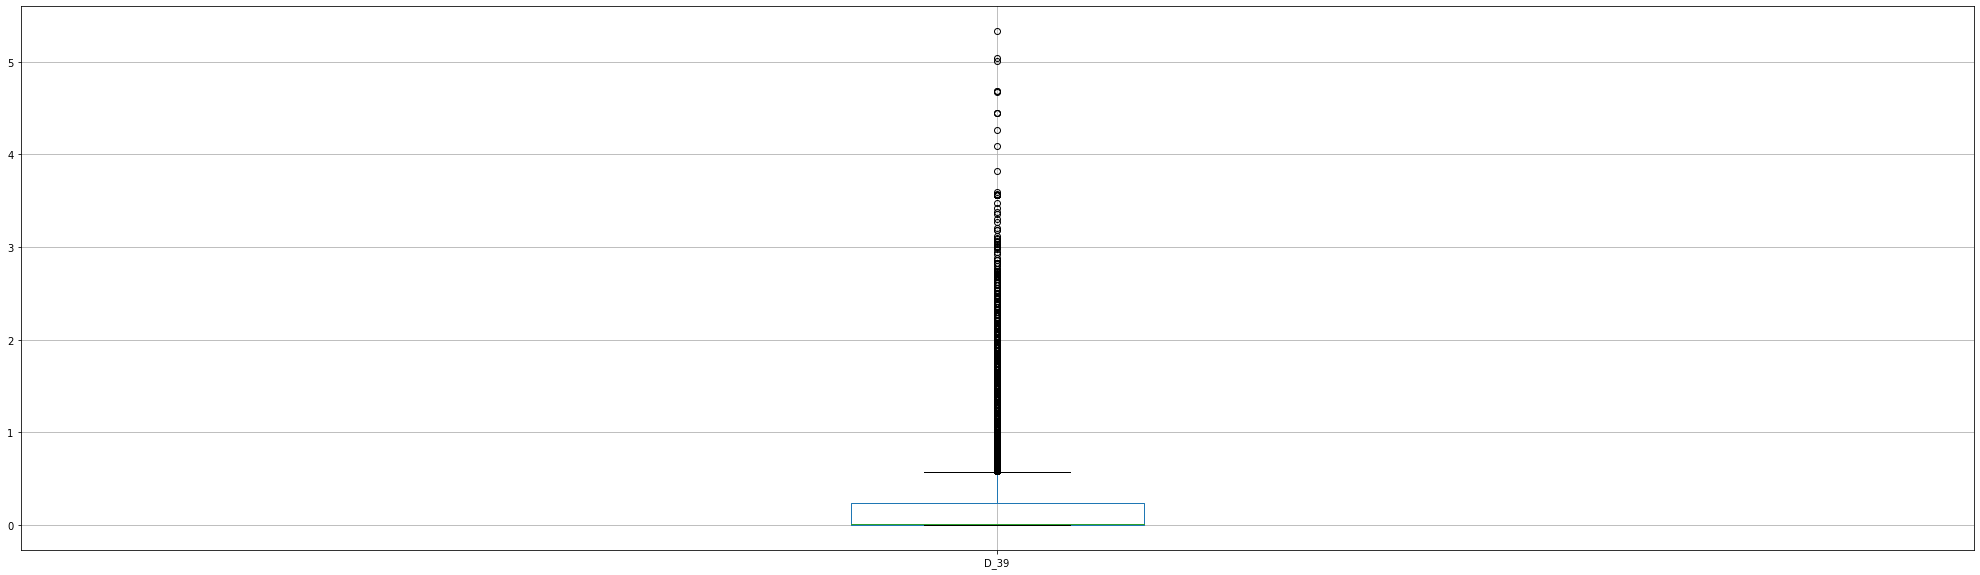

In [40]:
#Ploting boxplot
df.boxplot(figsize=(35,10),column='D_39')

In [41]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(df['D_39'])
print("Outliers from IQR method: ", len(sample_outliers))

Outliers from IQR method:  15441


In [34]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)


bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(df[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

197216


---
# Summary

---

* Variables (Columns) with missing value >= 50% was removed
* OneHotEncoder was used for encoding Categorical Variables
